In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [25]:
IMG_SIZE = [32,32]
batch_size = 50
epochs = 10
Classes = 2

Dataset Used :  https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images

Dataset
<h6>

>CIFAKE: Real and AI-Generated Synthetic Images
>The quality of AI-generated images has rapidly increased, leading to concerns of authenticity and trustworthiness.

>CIFAKE is a dataset that contains 60,000 synthetically-generated images and 60,000 real images (collected from CIFAR-10). Can computer vision techniques be used to detect when an image is real or has been generated by AI?

>Further information on this dataset can be found here: Bird, J.J. and Lotfi, A., 2024. CIFAKE: Image Classification and Explainable Identification of AI-Generated Synthetic Images. IEEE Access.
</h6>

In [26]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
    './train/',
    target_size = (IMG_SIZE[0], IMG_SIZE[1]),
    batch_size = batch_size,
    class_mode = 'binary'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True
)
test_generator = test_datagen.flow_from_directory(
    './test/',
    target_size = (IMG_SIZE[0], IMG_SIZE[1]),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 100000 images belonging to 2 classes.
Found 19789 images belonging to 2 classes.


In [27]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='softmax'),
    Dense(1, activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [29]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [30]:
history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = test_generator
)

Epoch 1/10


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x50x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x50x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

2000/2000 [==============================] - ETA: 0s - loss: 0.5320 - accuracy: 0.7665

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x50x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x50x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

2000/2000 [==============================] - 52s 24ms/step - loss: 0.5320 - accuracy: 0.7665 - val_loss: 0.4704 - val_accuracy: 0.7972
Epoch 2/10
2000/2000 [==============================] - 46s 23ms/step - loss: 0.3885 - accuracy: 0.8407 - val_loss: 0.4164 - val_accuracy: 0.8145
Epoch 3/10
2000/2000 [==============================] - 45s 22ms/step - loss: 0.3167 - accuracy: 0.8709 - val_loss: 0.2918 - val_accuracy: 0.8816
Epoch 4/10
2000/2000 [==============================] - 45s 22ms/step - loss: 0.2776 - accuracy: 0.8873 - val_loss: 0.4133 - val_accuracy: 0.8201
Epoch 5/10
2000/2000 [==============================] - 44s 22ms/step - loss: 0.2528 - accuracy: 0.8979 - val_loss: 0.3369 - val_accuracy: 0.8584
Epoch 6/10
2000/2000 [==============================] - 44s 22ms/step - loss: 0.2346 - accuracy: 0.9059 - val_loss: 0.2475 - val_accuracy: 0.8996
Epoch 7/10
2000/2000 [==============================] - 43s 22ms/step - loss: 0.2235 - accuracy: 0.9103 - val_loss: 0.3072 - val_accura

In [31]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def ll(path):
    def predict_label(image):
        pred = model.predict(image)
        if pred[0][0]*100>=50:
            return(str(pred[0][0]*100)+" | REAL")
        else:
            return(str(pred[0][0]*100)+" | AI")

    def preprocess_image(image_path):
        img = Image.open(image_path)
        img = img.resize((32, 32))  
        img = np.array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
        return img 

    folder_path = path

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    num_images = len(image_files)
    num_cols = 4
    num_rows = (num_images + num_cols - 1) // num_cols  

    plt.figure(figsize=(12, 6))  

    for i, image_file in enumerate(image_files, start=1):
        image_path = os.path.join(folder_path, image_file)
        image = preprocess_image(image_path)
        
        predicted_label = predict_label(image)
        
        image = cv2.imread(image_path)  
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
        
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image)
        plt.axis('off')  
        plt.title(predicted_label)

    plt.tight_layout()  
    plt.show()


ALL FAKE (AI)

1/1 [==============================] - 0s 10ms/step


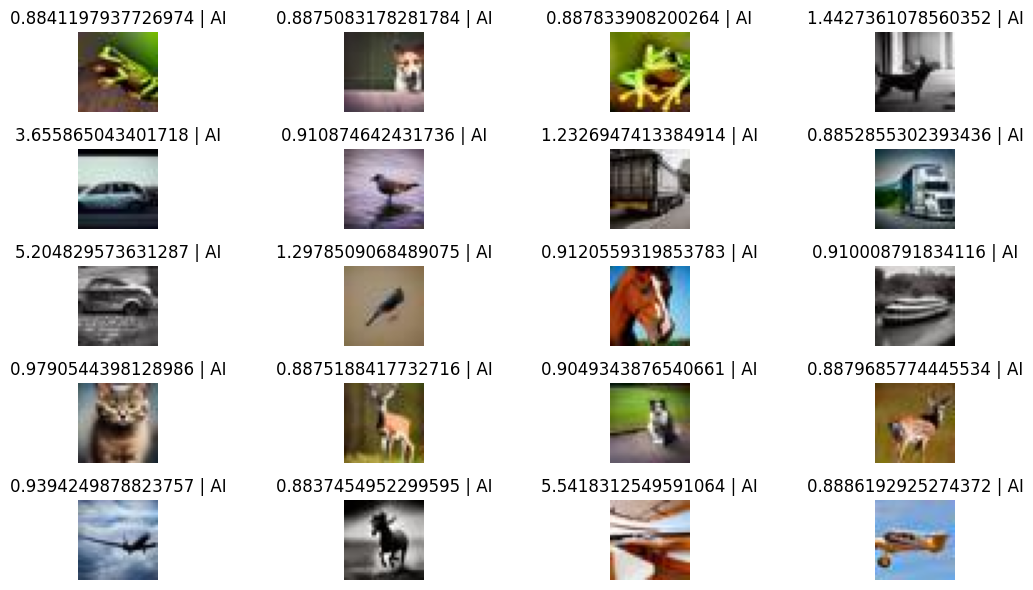

In [32]:
ll('./TESTSfake/')

ALL REAL

1/1 [==============================] - 0s 11ms/step


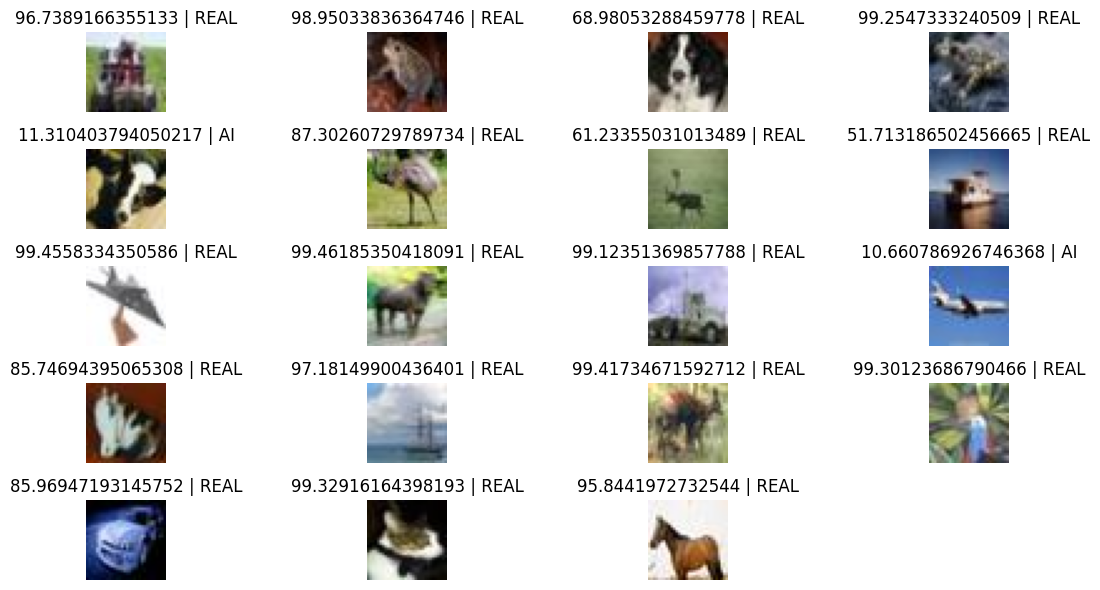

In [33]:
ll('./TESTSreal/')